# CMSIS-DSP Python package example

## Installing and importing the needed packages

The following command may take some time to execute : the full cmsisdsp library is built.

In [1]:
!pip install cmsisdsp

In [36]:
import numpy as np
import cmsisdsp as dsp
import cmsisdsp.fixedpoint as f

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
import ipywidgets as widgets

## Creating the signal

### Conversion functions to use CMSIS-DSP FFTs with complex numbers

CMSIS-DSP FFTs are processing  array of complex numbers which are represented in memory asan array of floats. There is no specific data types for complex numbers.
The Python array is containing complex numbers. They need to be replaced by a sequence of real numbers.
The two functions below are doing those conversions.

In [21]:
# Array of complex numbers as an array of real numbers
def imToReal1D(a):
    ar=np.zeros(np.array(a.shape) * 2)
    ar[0::2]=a.real
    ar[1::2]=a.imag
    return(ar)

# Array of real numbers as an array of complex numbers
def realToIm1D(ar):
    return(ar[0::2] + 1j * ar[1::2])

In [5]:
nb = 512
signal = None

You can play with the slider to change the frequency of the signal.
Don't forget to reconvert the signal to a Q15 format if you want to test the Q15 FFT.

In [18]:
@interact(f=FloatSlider(100,min=10,max=150,step=20,continuous_update=False))
def gen_signal(f=100):
    global signal
    global nb
    signal = np.sin(2 * np.pi * np.arange(nb)*f / nb) + 0.1*np.random.randn(nb)
    plt.plot(signal)
    plt.show()

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='f', max=150.0, min=10.0, …

## Using the F32 CMSIS-DSP FFT

The `arm_cfft_instance_f32` is created and initialized.

In [19]:
# CMSIS-DSP FFT F32 initialization
cfftf32=dsp.arm_cfft_instance_f32()
status=dsp.arm_cfft_init_f32(cfftf32,nb)
print(status)

0


The log magnitude of the FFT is computed and siplayed.

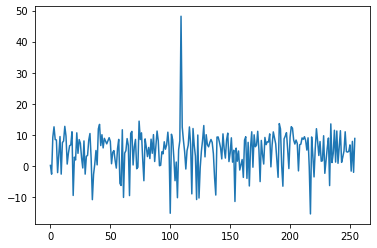

In [37]:
# Re-evaluate this each time you change the signal
signalR = imToReal1D(signal)
resultR = dsp.arm_cfft_f32(cfftf32,signalR,0,1)
resultI = realToIm1D(resultR)
mag=20 * np.log10(np.abs(resultI))

plt.plot(mag[1:nb//2])
plt.show()

## Using the Q15 CMSIS-DSP FFT

The signal must be converted to Q15 each time it is changed with the slider above.

In [38]:
# Convert the signal to Q15 and viewed as a real array
signalR = imToReal1D(signal)
signalRQ15 = f.toQ15(signalR)

The `arm_cfft_instance_q15` is created and initialized

In [25]:
# Initialize the Q15 CFFT
cfftq15 = dsp.arm_cfft_instance_q15()
status = dsp.arm_cfft_init_q15(cfftq15,nb)
print(status)

0


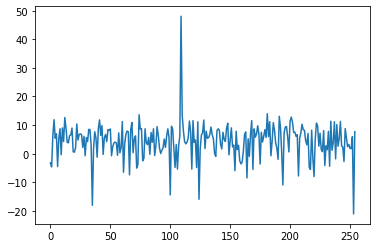

In [39]:
# Compute the Q15 CFFT and convert back to float and complex array
resultR = dsp.arm_cfft_q15(cfftq15,signalRQ15,0,1)
resultR = f.Q15toF32(resultR)
resultI = realToIm1D(resultR)*nb

mag = 20 * np.log10(np.abs(resultI))
plt.plot(mag[1:nb//2])
plt.show()